In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)
rmse

0.5053326657968706

## Implementing MLPs with Keras

In [2]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

2022-11-13 07:09:35.108575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [4]:
# scale to between 0 and 1
X_train, X_valid, X_test = X_train / 255., X_valid/255., X_test / 255.

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [6]:
class_names[y_train[0]]

'Ankle boot'

In [7]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

2022-11-13 07:09:42.494785: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 100)               30100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.layers

In [11]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [12]:
model.get_layer('dense_4') is hidden1

False

In [13]:
weights, biases = hidden1.get_weights()
weights

array([[-0.00903878,  0.04263641,  0.03611048, ...,  0.01676431,
        -0.05566153,  0.03647836],
       [ 0.03642784,  0.05168061,  0.03907175, ..., -0.01996819,
        -0.03127964,  0.06135322],
       [ 0.02367218, -0.05895857, -0.01288284, ..., -0.0575193 ,
         0.06191799,  0.01051725],
       ...,
       [ 0.00851274,  0.0592355 ,  0.01862228, ...,  0.00297958,
         0.04230702, -0.00431602],
       [ 0.04356793, -0.0567153 ,  0.05440387, ...,  0.04698247,
        -0.05920484, -0.01311858],
       [-0.02092529,  0.06715091,  0.06187996, ...,  0.00760102,
         0.03503428,  0.04741631]], dtype=float32)

In [14]:
weights.shape

(784, 300)

In [15]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [16]:
biases.shape

(300,)

In [17]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7119 - accuracy: 0.7666 - val_loss: 0.5047 - val_accuracy: 0.8276
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4868 - accuracy: 0.8313 - val_loss: 0.4559 - val_accuracy: 0.8348
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4397 - accuracy: 0.8459 - val_loss: 0.4283 - val_accuracy: 0.8506
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4145 - accuracy: 0.8551 - val_loss: 0.3965 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3936 - accuracy: 0.8624 - val_loss: 0.3898 - val_accuracy: 0.8588
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8667 - val_loss: 0.3968 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3650 - accuracy: 0.8708 - val_loss: 0.3730 - val_accuracy:

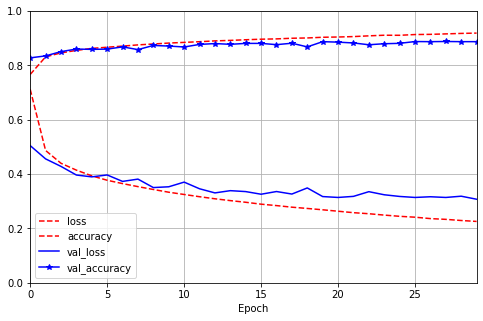

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,29], ylim=[0,1], grid=True, xlabel="Epoch",
    style=["r--", "r--", "b-", "b-*"])
plt.show()

In [20]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8831


[0.32878628373146057, 0.8830999732017517]

In [21]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 97ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.98],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [22]:
import numpy as np
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [23]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

### Building a Regression MLP Using the Sequential API

In [24]:
tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model1 = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model1.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 6s 3ms/step - loss: 8.5749 - root_mean_squared_error: 2.9283 - val_loss: 8.4149 - val_root_mean_squared_error: 2.9010
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.3042 - root_mean_squared_error: 2.8817 - val_loss: 8.3930 - val_root_mean_squared_error: 2.8972
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2875 - root_mean_squared_error: 2.8788 - val_loss: 8.4038 - val_root_mean_squared_error: 2.8991
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2806 - root_mean_squared_error: 2.8776 - val_loss: 8.4524 - val_root_mean_squared_error: 2.9074
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2743 - root_mean_squared_error: 2.8765 - val_loss: 8.3894 - val_root_mean_squared_error: 2.8967
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2645 - root_mean_squared_error: 2.8748 - val_loss: 8

In [25]:
mse_test, rmse_test = model1.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model1.predict(X_new)

1/1 [==============================] - 0s 164ms/step


## Building Complex Models Using the Functional API

In [26]:
# wide and deep network
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

In [27]:
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 2ms/step - loss: 8.5196 - root_mean_squared_error: 2.9189 - val_loss: 8.4096 - val_root_mean_squared_error: 2.9001
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2666 - root_mean_squared_error: 2.8752 - val_loss: 8.3772 - val_root_mean_squared_error: 2.8945
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2655 - root_mean_squared_error: 2.8750 - val_loss: 8.4709 - val_root_mean_squared_error: 2.9106
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2635 - root_mean_squared_error: 2.8746 - val_loss: 8.3827 - val_root_mean_squared_error: 2.8955
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2579 - root_mean_squared_error: 2.8737 - val_loss: 8.3928 - val_root_mean_squared_error: 2.8972
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 8.2552 - root_mean_squared_error: 2.8732 - val_loss: 8

In [28]:
mse_test, rmse_test = model.evaluate(X_test, y_test)
rmse_test

313/313 [==============================] - 1s 2ms/step - loss: 8.2503 - root_mean_squared_error: 2.8723


2.872331380844116

In [29]:
# can send different portions of the features down different pahts
input_wide = tf.keras.layers.Input(shape=[5])
input_deep = tf.keras.layers.Input(shape=[6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

In [30]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_new[:, :5], X_new[:, 2:]

#norm_layer_wide.adapt(X_train_wide)
#norm_layer_deep.adapt(X_train_deep)
#history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
#                   validation_data=((X_valid_wide, X_valid_deep), y_valid))
#mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
#y_pred = model.predict((X_new_wide, X_new_deep))

In [31]:
# Can specify multiple outputs
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                      outputs=[output, aux_output])

In [32]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer, 
             metrics=["RootMeanSquaredError"])

In [33]:
#norm_layer_wide.adapt(X_train_wide)
#norm_layer_deep.adapt(X_train_deep)
#history= model.fit(
#    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
#    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
#)

## Using the Subclassing API to Build Dynamic Models

In [34]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)
    
    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
    
model = WideAndDeepModel(30, activation="relu", name="my_cool_model")

In [35]:
model1.save("my_keras_model", save_format="tf")

INFO:tensorflow:Assets written to: my_keras_model/assets


In [36]:
model2 = tf.keras.models.load_model("my_keras_model")
y_pred_main = model2.predict((X_new))

1/1 [==============================] - 0s 154ms/step


## Using Callbacks

In [37]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)
#history = model.fit([...], callbacks=[checkpoint_cb])

In [38]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
#history = model.fit([...], callbacks=[checkpoint_cb, early_stopping_cb])

In [39]:
# Custom Callbacks
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [40]:
from pathlib import Path
from time import strftime

def get_run_logdir(root_logdir="my_logs"):
    return Path(root_logdir) / strftime("run_%Y_%m_d_%H_%M_%S")

run_logdir = get_run_logdir()

In [41]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(run_logdir, profile_batch=(100,200))
history = model1.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid), 
                     callbacks=[tensorboard_cb])

2022-11-13 07:14:48.311275: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-13 07:14:48.311299: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.
2022-11-13 07:14:48.311504: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.


Epoch 1/20
 172/1719 [==>...........................] - ETA: 4s - loss: 8.3077 - root_mean_squared_error: 2.8823

2022-11-13 07:14:48.821610: I tensorflow/core/profiler/lib/profiler_session.cc:101] Profiler session initializing.
2022-11-13 07:14:48.821631: I tensorflow/core/profiler/lib/profiler_session.cc:116] Profiler session started.


 219/1719 [==>...........................] - ETA: 4s - loss: 8.2751 - root_mean_squared_error: 2.8766

2022-11-13 07:14:49.104230: I tensorflow/core/profiler/lib/profiler_session.cc:67] Profiler session collecting data.
2022-11-13 07:14:49.137730: I tensorflow/core/profiler/lib/profiler_session.cc:128] Profiler session tear down.
2022-11-13 07:14:49.172267: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_11_d_07_14_48/plugins/profile/2022_11_13_07_14_49

2022-11-13 07:14:49.195293: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to my_logs/run_2022_11_d_07_14_48/plugins/profile/2022_11_13_07_14_49/Richards-MacBook-Pro.local.trace.json.gz
2022-11-13 07:14:49.215705: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: my_logs/run_2022_11_d_07_14_48/plugins/profile/2022_11_13_07_14_49

2022-11-13 07:14:49.216130: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to my_logs/run_2022_11_d_07_14_48/plugins

1719/1719 [==============================] - 5s 3ms/step - loss: 8.2465 - root_mean_squared_error: 2.8717 - val_loss: 8.3694 - val_root_mean_squared_error: 2.8932
Epoch 2/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2431 - root_mean_squared_error: 2.8711 - val_loss: 8.3674 - val_root_mean_squared_error: 2.8928
Epoch 3/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2452 - root_mean_squared_error: 2.8715 - val_loss: 8.3943 - val_root_mean_squared_error: 2.8974
Epoch 4/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2448 - root_mean_squared_error: 2.8714 - val_loss: 8.3662 - val_root_mean_squared_error: 2.8926
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2436 - root_mean_squared_error: 2.8712 - val_loss: 8.3761 - val_root_mean_squared_error: 2.8943
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 8.2437 - root_mean_squared_error: 2.8712 - val_loss: 8.3684 - val

In [42]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Reusing TensorBoard on port 6006 (pid 68175), started 2 days, 21:01:21 ago. (Use '!kill 68175' to kill it.)

In [43]:
test_logdir = get_run_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000+1):
        tf.summary.scalar("my_scalar", np.sin(step/10), step=step)
        
        data = (np.random.randn(100)+2) * step / 100
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

## Fine-Tuning Neural Network Hyperparameters

In [44]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value= 1e-2, sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
        
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [45]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 35s]
val_accuracy: 0.8840000033378601

Best val_accuracy So Far: 0.8840000033378601
Total elapsed time: 00h 02m 49s
INFO:tensorflow:Oracle triggered exit


In [46]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [47]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 70,
 'learning_rate': 0.00041268008323824807,
 'optimizer': 'adam'}

In [48]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_neurons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.8840000033378601


In [49]:
best_trial.metrics.get_last_value("val_accuracy")

0.8840000033378601

In [50]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6028 - accuracy: 0.8230
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4385 - accuracy: 0.8553
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3814 - accuracy: 0.8669
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3546 - accuracy: 0.8751
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3442 - accuracy: 0.8777
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3254 - accuracy: 0.8823
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3156 - accuracy: 0.8847
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3054 - accuracy: 0.8889
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8924
Epoch 10/10
313/313 [==============================] - 1s 1ms/step - loss: 2.0222 

In [51]:
# If you want to tune preprocessing or tune parameters to the fit function you have to subclass kt.HyperModel
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)
    
    def fit(self, hp, model, X, y, **kwargs):
        if hp.Boolean("normalize"):
            norm_layer = tf.keras.layers.Normalization()
            X = norm_layer(X)
        return model.fit(X, y, **kwargs)

In [52]:
hyperband_tuner = kt.Hyperband(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)

In [53]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 00m 33s]
val_accuracy: 0.8435999751091003

Best val_accuracy So Far: 0.8844000101089478
Total elapsed time: 00h 15m 23s
INFO:tensorflow:Oracle triggered exit


In [54]:
%tensorboard --logdir=./my_fashon_mnist/hyperband/tensorboard

Reusing TensorBoard on port 6007 (pid 82844), started 2 days, 14:34:06 ago. (Use '!kill 82844' to kill it.)

In [55]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt"
)
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                      validation_data=(X_valid, y_valid),
                      callbacks=[early_stopping_cb, tensorboard_cb])

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.8781999945640564

Best val_accuracy So Far: 0.8859999775886536
Total elapsed time: 00h 05m 21s
INFO:tensorflow:Oracle triggered exit


## Avoid Overfitting Through Regularization

In [57]:
layer = tf.keras.layers.Dense(100, activation="relu",
                              kernel_initializer="he_normal",
                              kernel_regularizer=tf.keras.regularizers.l2(0.01))

In [62]:
from functools import partial

# DRY

RegularizedDense = partial(tf.keras.layers.Dense,
                          activation="relu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=tf.keras.regularizers.l2(0.01))

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    RegularizedDense(100),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax")
])

# L2 is fine for SGD, momentum, and nesterov, but not Adam. Use AdamW (weight decay) instead

### Dropout
set dropout probability betwen 10% and 50%. RNNs 20-30%, CNNs 40-50%.  
In practice, dropout generally applied only to top 3 hidden laters. (never output).  
During inference, need to multiply the input weights by (1-p), to compensate for the stronger signal without dropout. 

In [66]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28,28]),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu",
                         kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(100, activation="relu", 
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])
# Then compile and train

In [67]:
# Monte Carlo (MC) Dropout
# Applied to trained dropout models, can give more accurate predictions, at the cost of latency
import numpy as np
y_probas = np.stack([model(X_test, training=True) 
                    for sample in range(100)])
y_proba = y_probas.mean(axis=0)

# Instead of setting training to true, if you have other things that behave differently in training 
# That you don't also want in training mode for inference use MC dropout instead of dropout
class MCDropout(tf.keras.layers.Dropout):
    def call(self, inputs, training=False):
        return super().call(inputs, training=True)

### Max-Norm Regularization
reduces parameter weights 

In [69]:
dense = tf.keras.layers.Dense(
    100, activation="relu", kernel_initializer="he_normal",
    kernel_constraint=tf.keras.constraints.max_norm(1.))